# **Performance Metrics in Machine Learning**

## Introduction

Performance metrics are a part of every machine learning pipeline. They tell you if you’re making progress, and put a number on it.If you ever participated in a Kaggle competition, you probably noticed the evaluation section. More often than not, there’s a metric on which they judge your performance.

Metrics are different from loss functions. Loss functions show a measure of model performance. They’re used to train a machine learning model (using some kind of optimization like Gradient Descent), and they’re usually differentiable in the model’s parameters. 

Metrics are used to monitor and measure the performance of a model (during training and testing), and don’t need to be differentiable. 

## Regression Metrics

Regression models have continuous output. So, we need a metric based on calculating some sort of distance between predicted and ground truth.

In order to evaluate Regression models, we’ll discuss these metrics in detail:

*   ***Mean Absolute Error (MAE),***
*   ***Mean Squared Error (MSE),***
*   ***Root Mean Squared Error (RMSE),***
*   ***R² (R-Squared).***
*   ***Adjusted R square*** 

##### we will use California hosing price dataset form scikit-learn to show you how all of this metrics words

In [77]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')
data = fetch_california_housing()
X = data.data  
y = data.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 1. Mean Absolute Error (MAE)

Mean Absolute Error (MAE) is a popular metric used to evaluate the performance of regression models in machine learning and statistics. It measures the average magnitude of errors between predicted and actual values without considering their direction. MAE is especially useful in applications that aim to minimize the average error and is less sensitive to outliers than other metrics like Mean Squared Error (MSE).

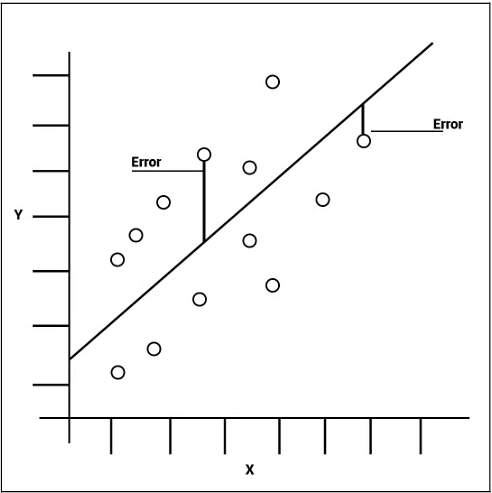

Given a dataset with **n** observations, where **y_i** is the actual value and **x_i** is the predicted value for the **i-th** data point in the dataset, the Mean Absolute Error **(MAE)** can be calculated using the following formula:

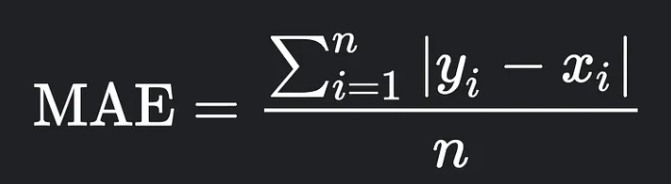


In [78]:
def MAE(y_true,y_pred):
    """
    Calculate the mean absolute error
    """
    return np.mean(np.abs(y_true-y_pred))

print(f" Mean absolute error using scikit-learn : {mean_absolute_error(y_test,y_pred)}")
print(f" Mean absolute error using the formula : {MAE(y_test,y_pred)}")

 Mean absolute error using scikit-learn : 0.5332001304956989
 Mean absolute error using the formula : 0.5332001304956989


## 2. Mean Squared Error

The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. 

Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function. 

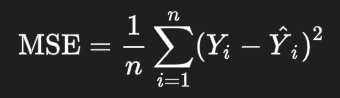

In [79]:
def MSE(y_true,y_pred):
    """
    Calculate the mean squared error
    """
    return np.mean((y_true-y_pred) ** 2)

print(f" Mean squared error using scikit-learn : {mean_squared_error(y_test,y_pred)}")
print(f" Mean squared error using the formula : {MSE(y_test,y_pred)}")

 Mean squared error using scikit-learn : 0.5558915986952426
 Mean squared error using the formula : 0.5558915986952426


## 3. Root mean squared Error

The Mean Squared Error (MSE) square root measures the average squared difference between the predicted and actual values. Root Mean Squared Error (RMSE) has the same unit as the target variable, making it more interpretable and easier to relate to the problem context than MSE.

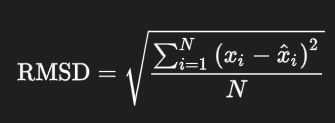

In [80]:
def RMSE(y_true,y_pred):
    """
    Calculate the root mean squared error
    """
    return np.sqrt(MSE(y_true, y_pred))

print(f" Mean squared error using scikit-learn : {root_mean_squared_error(y_test,y_pred)}")
print(f" Mean squared error using the formula : {RMSE(y_test,y_pred)}")

 Mean squared error using scikit-learn : 0.7455813830127752
 Mean squared error using the formula : 0.7455813830127752


## 4.R-Squared
R Squared (R2), also known as the coefficient of determination, measures the proportion of the total variation in the target variable explained by the model's predictions.

R2 ranges from 0 to 1, with higher values indicating a better model fit.

The significance of R2 lies in its ability to provide an intuitive and easily interpretable measure of how well the model captures the underlying structure of the data.

It tells us the percentage of the variation in the target variable that the model's predictors can explain. R2 is particularly useful when comparing different models on the same dataset, as it can help identify the model that best explains the variation in the target variable.

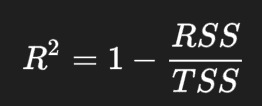

Where:

*   RSS = sum of squared residuals
*   TSS = total sum of squares

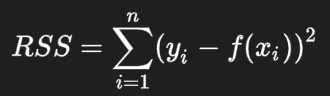

*   where  ***f(xi)*** is predicted value of yi

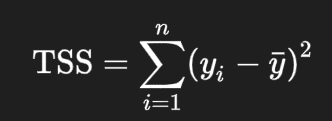

*   where ***y_hat*** is the mean value of a sample

In [81]:
def r2(y_true,y_pred):
    """
    Calculate the R squared
    """
    RSS = np.sum((y_true - y_pred) ** 2)
    
    TSS = np.sum((y_true - np.mean(y_true)) ** 2)
    
    return 1 - (RSS / TSS)

print(f"R² using scikit-learn : {r2_score(y_test, y_pred)}")
print(f"R² using the formula : {r2(y_test, y_pred)}")

R² using scikit-learn : 0.5757877060324521
R² using the formula : 0.5757877060324521


## 5. Adjusted R²

The Vanilla R² method suffers from some demons, like misleading the researcher into believing that the model is improving when the score is increasing but in reality, the learning is not happening. This can happen when a model overfits the data, in that case the variance explained will be 100% but the learning hasn’t happened. To rectify this, R² is adjusted with the number of independent variables.

Adjusted R² is always lower than R², as it adjusts for the increasing predictors and only shows improvement if there is a real improvement.

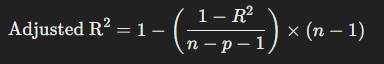

In [82]:
def adjusted_r2(y_true,y_pred):
    """
    Calculate the R squared adjusted
    """
    n, p = X_test.shape
    return 1 - (1 - r2(y_true, y_pred)) * (n - 1) / (n - p - 1)

print(f" R2 adjusted using the formula : {adjusted_r2(y_test,y_pred)}")

 R2 adjusted using the formula : 0.5749637928613571


## Classification Metrics

Classification problems are one of the world’s most widely researched areas. Use cases are present in almost all production and industrial environments. Speech recognition, face recognition, text classification – the list is endless. 

Classification models have discrete output, so we need a metric that compares discrete classes in some form. Classification Metrics evaluate a model’s performance and tell you how good or bad the classification is, but each of them evaluates it in a different way.

* ***Accuracy***
* ***Confusion Matrix (not a metric but fundamental to others)***
* ***Precision and Recall***
* ***F1-score***
* ***AU-ROC***

In [83]:
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, 
                             recall_score, f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt


data = load_breast_cancer()

X,y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 1. Accuracy
Classification accuracy is  the simplest metric to use and implement and is defined as the number of correct predictions divided by the total number of predictions, multiplied by 100. 

In [84]:
acc = accuracy_score(y_test, y_pred) * 100
print(f"{acc:.4f} %")

95.6140 %


## 2.Confusion Matrix
A confusion matrix, also known as an error matrix, is a tool used to evaluate the performance of classification models in machine learning and statistics. It presents a summary of the predictions made by a classifier compared to the actual class labels, allowing for a detailed analysis of the classifier's performance across different classes.

The confusion matrix provides a comprehensive view of the model's performance, including each class's correct and incorrect predictions. 

It helps identify misclassification patterns and calculate various evaluation metrics such as precision, recall, F1-score, and accuracy. By analyzing the confusion matrix, you can diagnose the model's strengths and weaknesses and improve its performance.

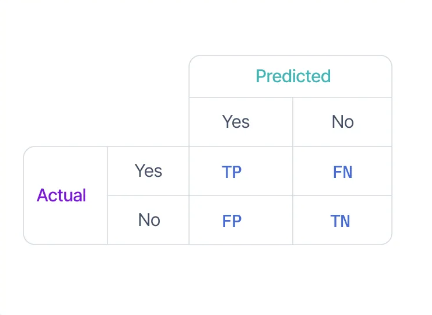

Each cell in the confusion matrix represents an evaluation factor. Let’s understand these factors one by one:

* True Positive(TP) signifies how many positive class samples your model predicted correctly.
* True Negative(TN) signifies how many negative class samples your model predicted correctly.
* False Positive(FP) signifies how many negative class samples your model predicted incorrectly. This factor represents Type-I error 
* False Negative(FN) signifies how many positive class samples your model predicted incorrectly. This factor represents Type-II error

In [85]:
confusion_matrix(y_test, y_pred)

array([[39,  4],
       [ 1, 70]], dtype=int64)

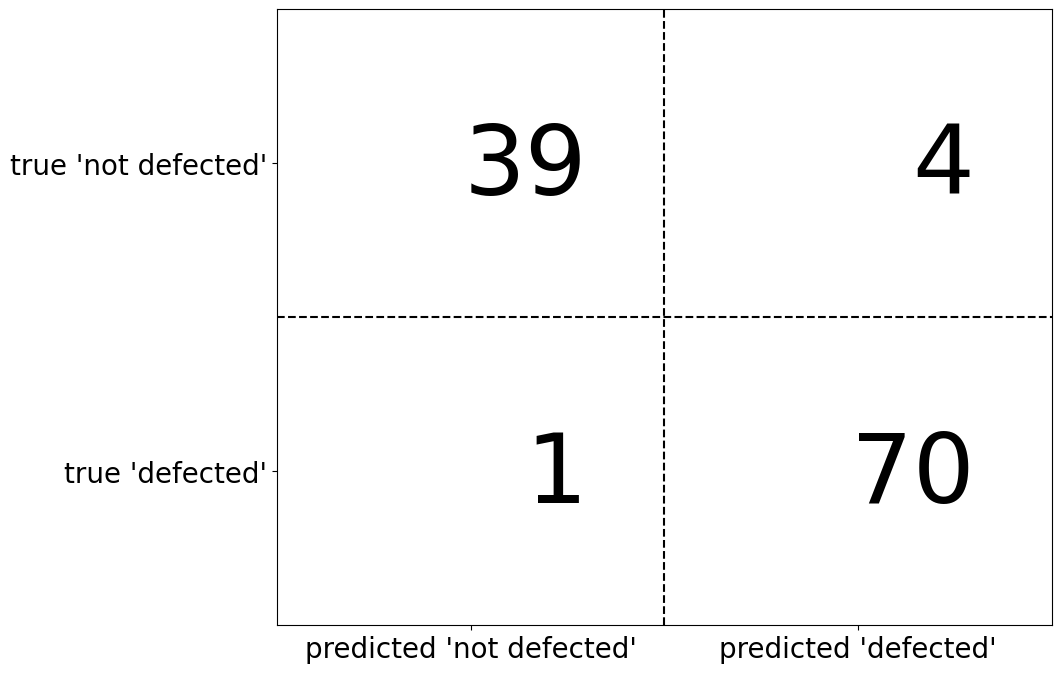

In [86]:
# this function from mglearn package

def plot_confusion_matrix_illustration():
    plt.figure(figsize=(10, 8))
    confusion = confusion_matrix(y_test, y_pred)
    plt.text(0.40, .7, confusion[0, 0], size=70, horizontalalignment='right')
    plt.text(0.40, .2, confusion[1, 0], size=70, horizontalalignment='right')
    plt.text(.90, .7, confusion[0, 1], size=70, horizontalalignment='right')
    plt.text(.90, 0.2, confusion[1, 1], size=70, horizontalalignment='right')
    plt.xticks([.25, .75], ["predicted 'not defected'", "predicted 'defected'"], size=20)
    plt.yticks([.25, .75], ["true 'defected'", "true 'not defected'"], size=20)
    plt.plot([.5, .5], [0, 1], '--', c='k')
    plt.plot([0, 1], [.5, .5], '--', c='k')

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
plot_confusion_matrix_illustration()

## 3. Precision and Recall

Precision and recall are essential evaluation metrics in machine learning for understanding the trade-off between false positives and false negatives.

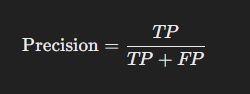

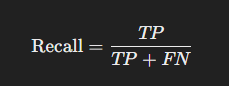

**When to use**

Precision and recall are useful when the class distribution is imbalanced or when the cost of false positives and false negatives is different.

**When not to use**

Accuracy might be more appropriate if the dataset is balanced and the costs of false positives and negatives are equal.

*   Precision answers the question: "Of all the instances the model predicted as positive, how many were actually positive?". It focuses on the accuracy of positive predictions. High precision means that the model makes few false positive errors.

*    Recall answers the question: "Of all the actual positive instances, how many did the model correctly identify?". It focuses on minimizing missed positive cases. High recall means the model captures most of the actual positive cases, but it might also predict some negatives as positives.



In [87]:

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

Precision: 0.9459459459459459
Recall: 0.9859154929577465


## 4. F1-score
The F1-score is the harmonic mean of precision and recall, providing a metric that balances both measures. It is beneficial when dealing with imbalanced datasets, where one class is significantly more frequent than the other. The formula for the F1 score is:

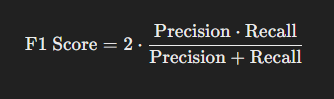


The significance of the F1 score lies in its ability to provide a harmonized assessment of a model's performance when both precision and recall are important. Unlike accuracy, which can be misleading in cases of class imbalance, the F1 score considers the balance between false positives and false negatives. 

A high F1 score indicates that the model has a high precision (low false positives) and high recall (low false negatives), which is often desirable in various applications.

**When to use**

The F1-score is useful when the class distribution is imbalanced or when the cost of false positives and false negatives is different.

**When not to use**

Accuracy might be more appropriate if the dataset is balanced and the costs of false positives and negatives are equal.

In [88]:
# F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.9655172413793104


## 5. Area Under the Receiver Operating Characteristic Curve (AU-ROC)
The AU-ROC is a popular evaluation metric for binary classification problems. It measures the model's ability to distinguish between positive and negative classes. The ROC curve plots the true positive rate (recall) against the false positive rate (1 - specificity) at various classification thresholds. The AU-ROC represents the area under the ROC curve, and a higher value indicates better model performance.

The significance of the AU-ROC lies in its ability to provide a comprehensive view of a model's performance across all possible classification thresholds. It considers the trade-off between true positive rate (TPR) and false positive rate (FPR) and quantifies the classifier's ability to differentiate between the two classes. 

A higher AU-ROC value indicates better performance, with a perfect classifier having an AU-ROC of 1 and a random classifier having an AU-ROC of 0.5.

AU-ROC: 0.9464461185718965


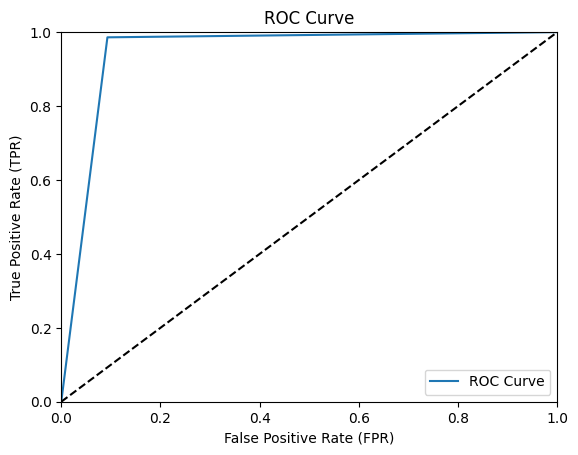

In [89]:
auc_roc = roc_auc_score(y_test, y_pred)
print(f'AU-ROC: {auc_roc}')

def plot_roc_curve(y_true, y_pred_prob):
    """
    Plot ROC curve for binary classification model.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc_curve(y_test, y_pred)

## Summary:

### Regression Metrics:

* MAE is less sensitive to outliers and provides a more balanced view of overall error. It is more robust in the presence of outliers compared to MSE or RMSE, which are highly influenced by outliers due to the squaring of errors.
*   MSE emphasizes larger errors, making it suitable for applications where big mistakes matter more. However, it can be skewed by outliers, which can inflate the overall error if they are present.

* RMSE is useful when larger errors need to be emphasized, but it can still be distorted by outliers. It provides a clearer understanding of the average error magnitude since it's in the same unit as the target variable.

*  R² explains how well the model captures the variability in the data. It is useful for understanding the overall goodness of fit, but it may not account for outliers effectively, especially in small datasets.

* Adjusted R² is more reliable for comparing models with different numbers of predictors, particularly in complex models. Like R², it can still be influenced by outliers, but it helps balance model complexity.


### Classification Metrics:

* Use Accuracy when classes are balanced.
* Use Confusion Matrix for detailed insights into model performance.
* Use Precision when false positives are critical (e.g., spam detection).
* Use Recall when false negatives are critical (e.g., disease detection).
* Use F1 Score when you need a balance between precision and recall, especially with imbalanced classes.
* Use AU-ROC when evaluating model performance at various thresholds.